In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

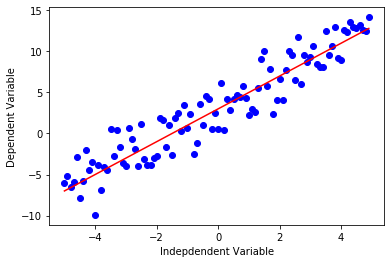

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

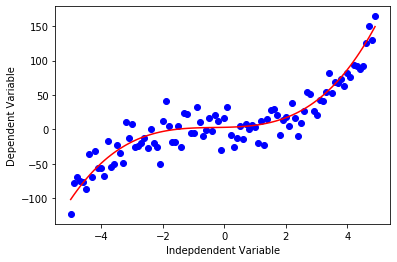

In [3]:
#Função cubica y=ax3+bx2+cx+d 

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

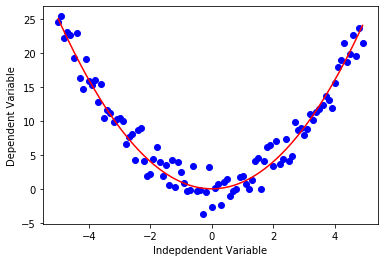

In [4]:
# Gráfico de função quadrática Y=X2

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

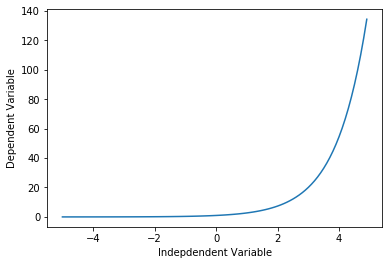

In [5]:
# Gráfico de função exponêncial -> Y=a+bcX

X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

/home/bruna_ramos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


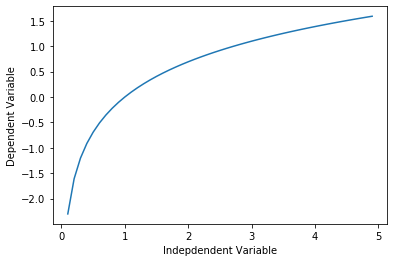

In [6]:
# Gráfico de função logarítima

X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

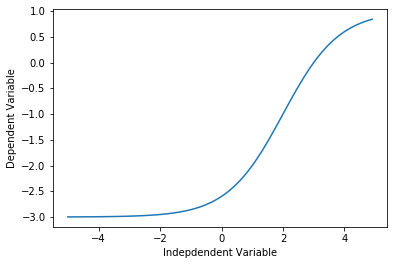

In [7]:
#Gráfico função logística:

X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [8]:
#exemplo de uma regressão não linear

import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2020-02-12 08:37:19 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


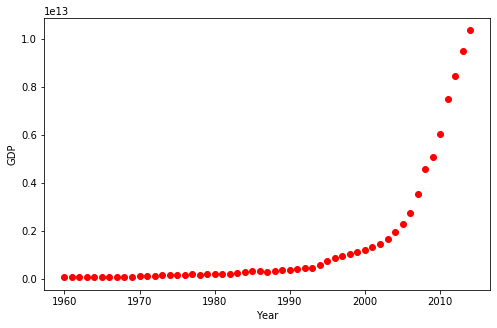

In [9]:
#plotando o grafico do meu dataframe eu consigo ter ideia de qual função meu dataset abriga, nesse caso 
#lembra um função exponencial.

plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

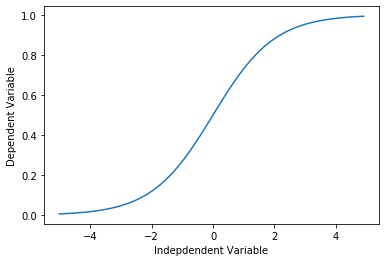

In [10]:
#The formula for the logistic function is the following:

Y^=11+eβ1(X−β2)

X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [13]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

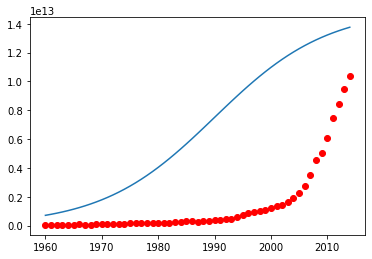

In [15]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [19]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
xdata

array([0.97318769, 0.97368421, 0.97418073, 0.97467726, 0.97517378,
       0.97567031, 0.97616683, 0.97666336, 0.97715988, 0.97765641,
       0.97815293, 0.97864945, 0.97914598, 0.9796425 , 0.98013903,
       0.98063555, 0.98113208, 0.9816286 , 0.98212512, 0.98262165,
       0.98311817, 0.9836147 , 0.98411122, 0.98460775, 0.98510427,
       0.98560079, 0.98609732, 0.98659384, 0.98709037, 0.98758689,
       0.98808342, 0.98857994, 0.98907646, 0.98957299, 0.99006951,
       0.99056604, 0.99106256, 0.99155909, 0.99205561, 0.99255214,
       0.99304866, 0.99354518, 0.99404171, 0.99453823, 0.99503476,
       0.99553128, 0.99602781, 0.99652433, 0.99702085, 0.99751738,
       0.9980139 , 0.99851043, 0.99900695, 0.99950348, 1.        ])

In [17]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


In [20]:
# write your code here
"""
msk = np.random.rand(len(df)) < 0.8

train_x =xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

y_hat = sigmoid(test_x, *popt)

print("MAE: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("MSE: %.2f" % np.mean((y_hat - test_y)**2))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat, test_y) )
"""


# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.99
